# Predict Car Price prediction with multiple features

In [18]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#Import the data Set
df = pd.read_csv(r"auto.csv")
df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [66]:
df.shape

(201, 31)

In [67]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,...,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,...,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,...,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,...,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,...,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,...,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,...,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
#Perform EDA Analysis on the data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [21]:
df2 = df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'price']]


In [42]:
#Find the Correlation Between Different Parameters
list1 = df2.columns.to_list()
for i in range(len(list1) - 1):
  a1 = pd.Series(df[list1[i]])
  a2 = pd.Series(df['price'])
  corr = a1.corr(a2)
  if corr >= 0.20:
    print(corr)
    print(list1[i])


0.5846418222655086
wheel-base
0.6906283804483644
length
0.7512653440522681
width
0.8344145257702834
curb-weight
0.8723351674455198
engine-size
0.5431553832626611
bore
0.8095745670036562
horsepower


wheel-base


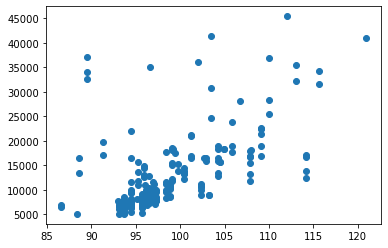

length


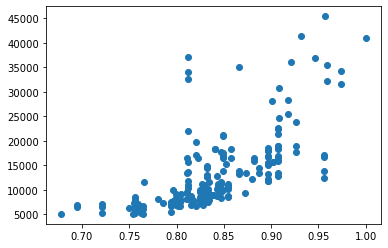

width


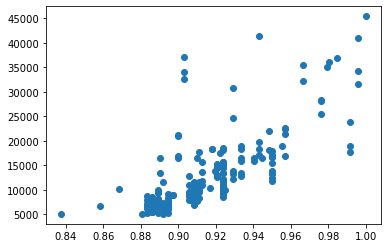

curb-weight


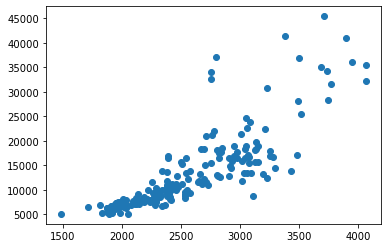

engine-size


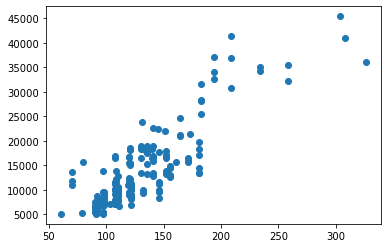

bore


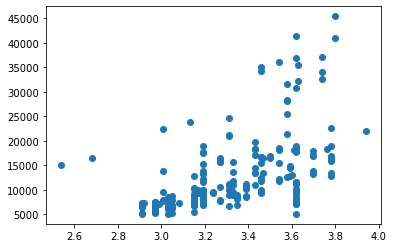

horsepower


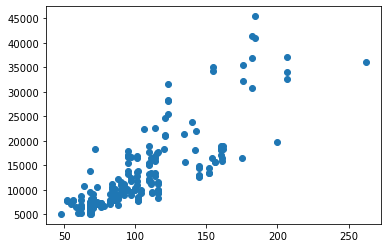

In [55]:
#Visualize the data using Matplotlib and Seaborn Libraries
for i in range(len(list1)-1):
  print(list1[i])
  plt.scatter(df2[list1[i]], df2['price'])
  plt.show()
  

In [44]:
df2.isnull().sum()

wheel-base     0
length         0
width          0
curb-weight    0
engine-size    0
bore           0
horsepower     0
price          0
dtype: int64

In [45]:
#Create Training and Testing Data
more_data = np.random.rand(len(df2)) < 0.8
train = df2[more_data]
test = df2[~more_data]
print(train)
print(test)

     wheel-base    length     width  curb-weight  engine-size  bore  \
0          88.6  0.811148  0.890278         2548          130  3.47   
1          88.6  0.811148  0.890278         2548          130  3.47   
2          94.5  0.822681  0.909722         2823          152  2.68   
3          99.8  0.848630  0.919444         2337          109  3.19   
4          99.4  0.848630  0.922222         2824          136  3.19   
..          ...       ...       ...          ...          ...   ...   
193       104.3  0.907256  0.933333         3042          141  3.78   
195       104.3  0.907256  0.933333         3157          130  3.62   
197       109.1  0.907256  0.955556         3049          141  3.78   
198       109.1  0.907256  0.956944         3012          173  3.58   
200       109.1  0.907256  0.956944         3062          141  3.78   

     horsepower    price  
0         111.0  13495.0  
1         111.0  16500.0  
2         154.0  16500.0  
3         102.0  13950.0  
4         11

In [56]:
#Train the model Using Linear Regression model
from sklearn import linear_model as lm

In [57]:
clf = lm.LinearRegression() 

In [58]:
train_x = train.to_numpy()
train_y = train['price'].to_numpy().reshape(-1, 1)
test_x = test.to_numpy()
test_y = test['price'].to_numpy().reshape(-1, 1)
clf.fit(train_x, train_y)

LinearRegression()

In [60]:
#Print intercept and Coefficient
intercept = clf.intercept_

In [61]:
slope = clf.coef_
slope

array([[ 6.31135096e-14, -3.38140810e-12,  4.55506175e-11,
        -3.28125275e-15, -2.46439636e-14, -2.28695552e-13,
        -2.86913415e-15,  1.00000000e+00]])

In [62]:
#Predict the values from testing data 
x = clf.predict(test_x)
x

array([[17710.],
       [ 7957.],
       [ 6229.],
       [12964.],
       [ 6855.],
       [ 6529.],
       [ 8845.],
       [10295.],
       [12945.],
       [35550.],
       [ 6795.],
       [ 6695.],
       [ 8495.],
       [28176.],
       [31600.],
       [34184.],
       [35056.],
       [ 6189.],
       [ 9959.],
       [12629.],
       [ 6989.],
       [ 7349.],
       [ 7799.],
       [13499.],
       [17199.],
       [15580.],
       [16900.],
       [16630.],
       [17950.],
       [ 7957.],
       [ 7609.],
       [ 8921.],
       [32528.],
       [18150.],
       [ 7898.],
       [ 7738.],
       [ 9258.],
       [ 9298.],
       [17669.],
       [ 9988.],
       [10898.],
       [16558.],
       [15750.],
       [13295.],
       [12290.],
       [12940.],
       [18420.],
       [16845.],
       [22470.]])

In [63]:
test_y[i]

array([8845.])

In [64]:
#Compare any 2 predicted and actual values
for i in range(len(test_y)):
  print(test_y[i] - x[i])


[-7.27595761e-12]
[3.63797881e-12]
[3.63797881e-12]
[1.8189894e-12]
[2.72848411e-12]
[2.72848411e-12]
[1.8189894e-12]
[3.63797881e-12]
[0.]
[-7.27595761e-12]
[2.72848411e-12]
[2.72848411e-12]
[1.8189894e-12]
[-7.27595761e-12]
[-7.27595761e-12]
[-7.27595761e-12]
[-7.27595761e-12]
[2.72848411e-12]
[1.8189894e-12]
[1.8189894e-12]
[4.54747351e-12]
[3.63797881e-12]
[2.72848411e-12]
[3.63797881e-12]
[0.]
[-1.8189894e-12]
[0.]
[0.]
[0.]
[3.63797881e-12]
[3.63797881e-12]
[3.63797881e-12]
[-7.27595761e-12]
[0.]
[3.63797881e-12]
[2.72848411e-12]
[1.8189894e-12]
[3.63797881e-12]
[0.]
[1.8189894e-12]
[0.]
[0.]
[1.8189894e-12]
[0.]
[0.]
[1.8189894e-12]
[0.]
[0.]
[-7.27595761e-12]


In [65]:
#Perform MAE, MSE and RMSE analysis
mae = np.mean(np.absolute(test_y[i] - x[i]))
mse = np.mean((test_y[i] - x[i]) ** 2)
rmse = np.sqrt(np.mean((test_y[i] - x[i]) ** 2))
print(mae)
print(mse)
print(rmse)

7.275957614183426e-12
5.293955920339377e-23
7.275957614183426e-12
